In [1]:
# Importation des packages pour PCA
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
sns.set()

# Prise de contact avec la Data-Set

In [3]:
# Importation du fichier
inter = pd.read_csv("help_international.csv", decimal='.', index_col=0, sep=';')
inter.head()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
pays,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [4]:
inter.tail()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
pays,,,,,,,,,
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0
Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1460.0


In [5]:
# Dimension
inter.shape

(167, 9)

In [6]:
# Informations globales
inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   enfant_mort      163 non-null    float64
 1   exportations     167 non-null    float64
 2   dep_sante        167 non-null    float64
 3   importations     167 non-null    float64
 4   revenu           167 non-null    float64
 5   taux_croissance  167 non-null    float64
 6   life_expec       167 non-null    float64
 7   total_fertilite  167 non-null    float64
 8   pib_par_hab      167 non-null    float64
dtypes: float64(9)
memory usage: 13.0+ KB


In [7]:
# %tage de valeurs manquantes
inter.isna().mean()

enfant_mort        0.023952
exportations       0.000000
dep_sante          0.000000
importations       0.000000
revenu             0.000000
taux_croissance    0.000000
life_expec         0.000000
total_fertilite    0.000000
pib_par_hab        0.000000
dtype: float64

In [8]:
# Doublons?
inter.duplicated().sum()

0

In [9]:
# Valeurs différentes par colonnes
inter.nunique()

enfant_mort        136
exportations       147
dep_sante          147
importations       152
revenu             156
taux_croissance    156
life_expec         127
total_fertilite    138
pib_par_hab        157
dtype: int64

In [10]:
# Resumé Statistique
inter.describe()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
count,163.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.796319,41.353287,7.760838,45.622311,17023.158084,130.486383,69.298443,4.390359,12901.535449
std,40.251602,27.936119,7.643689,24.765596,19359.928835,998.815277,12.674000,9.581274,18367.132440
min,2.600000,0.109000,1.810000,0.065900,49.600000,-4.210000,2.040000,1.150000,1.470000
25%,7.850000,23.800000,4.950000,28.850000,3170.000000,1.810000,64.300000,1.820000,1310.000000
50%,19.200000,35.000000,6.330000,42.900000,9940.000000,5.450000,73.100000,2.410000,4660.000000
75%,60.400000,51.400000,8.865000,58.050000,22800.000000,11.150000,76.800000,4.160000,14050.000000
max,208.000000,200.000000,85.100000,174.000000,125000.000000,11400.000000,82.800000,74.000000,105000.000000


# Prétraitement 

In [11]:
df = inter.copy()

In [12]:
df.head()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
pays,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


## 1- Traitement des valeurs manquantes

In [13]:
# %tage de valeurs manquantes
inter.isna().mean()

enfant_mort        0.023952
exportations       0.000000
dep_sante          0.000000
importations       0.000000
revenu             0.000000
taux_croissance    0.000000
life_expec         0.000000
total_fertilite    0.000000
pib_par_hab        0.000000
dtype: float64

In [14]:
# Lister les pays avec valeurs manquantes
listePaysNaN = df[df.enfant_mort.isna()].index.to_list()
listePaysNaN

['Congo1', 'Congo2', 'Macedonia', 'Micronesia']

In [15]:
# Imputation par des valeurs fixes

data_dict = {'Micronesia':40.87, 'Macedonia': 11.93, 'Congo1': 80.5, 'Congo2': 110.86}

# Mettre à jour le DataFrame en utilisant les clés et les valeurs du dictionnaire
for pays, valeur in data_dict.items():
    df.loc[df.index == pays, 'enfant_mort'] = valeur

In [16]:
# Verification de l'imputation 
df.isna().mean()

enfant_mort        0.0
exportations       0.0
dep_sante          0.0
importations       0.0
revenu             0.0
taux_croissance    0.0
life_expec         0.0
total_fertilite    0.0
pib_par_hab        0.0
dtype: float64

In [17]:
df.describe().round(2)

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.35,41.35,7.76,45.62,17023.16,130.49,69.30,4.39,12901.54
std,40.35,27.94,7.64,24.77,19359.93,998.82,12.67,9.58,18367.13
min,2.60,0.11,1.81,0.07,49.60,-4.21,2.04,1.15,1.47
25%,8.25,23.80,4.95,28.85,3170.00,1.81,64.30,1.82,1310.00
50%,19.30,35.00,6.33,42.90,9940.00,5.45,73.10,2.41,4660.00
75%,62.10,51.40,8.86,58.05,22800.00,11.15,76.80,4.16,14050.00
max,208.00,200.00,85.10,174.00,125000.00,11400.00,82.80,74.00,105000.00


In [18]:
dfOk = df.copy()
dfOk.head()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
pays,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


## Séparation des données 

In [19]:
# La matrice des données X
X = df.values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [20]:
type(X)

numpy.ndarray

In [21]:
# Verification de la forme
X.shape

(167, 9)

In [22]:
# Enregistrement des noms des pays dans names
names = df.index
names

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='pays', length=167)

In [23]:
# Enregistrement des noms des colonnes dans names
features = df.columns
features

Index(['enfant_mort', 'exportations', 'dep_sante', 'importations', 'revenu',
       'taux_croissance', 'life_expec', 'total_fertilite', 'pib_par_hab'],
      dtype='object')

# Analyse en Composantes Principales (PCA)

## Centrage et reduction

In [24]:
# Scaling, fit and transform
scaler = StandardScaler()

# Entraînement 
scaler.fit(X)

# Transformation 
Xscaled = scaler.transform(X)
Xscaled[:5]

array([[ 1.28881562, -1.12569622, -0.02372967, -0.02925361, -0.79853153,
        -0.12155444, -1.0365975 ,  0.14966072, -0.67433901],
       [-0.54073919, -0.47943123, -0.15888663,  0.12059652, -0.36748539,
        -0.12652522,  0.55409611, -0.28687217, -0.4811876 ],
       [-0.27475772, -0.10603368, -0.47119106, -0.5760041 , -0.21361435,
        -0.11486649,  0.5699239 , -0.15706383, -0.46098233],
       [ 2.00472837,  0.75206261, -0.64440193, -0.11025368, -0.57627336,
        -0.10854005, -0.72795545,  0.18525333, -0.51176854],
       [-0.6973451 ,  0.14888195, -0.22712121,  0.53774689,  0.10759792,
        -0.12958802,  0.5936656 , -0.23662378, -0.03831003]])

In [25]:
# Vérification 
idx = ["mean", "std"]

CR = pd.DataFrame(Xscaled).describe().round(2).loc[idx, :]

In [26]:
CR.columns = features
# CR.index = [f"F{i}" for i in xListe]
CR.round(2)

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
mean,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ACP

In [27]:
nComponents = 9

In [28]:
# Instanciation de l'ACP
pca = PCA(n_components=nComponents)

In [29]:
# Entraînement 
pca.fit(Xscaled)

PCA(n_components=9)

## Variance expliquées et Scree Plot

In [30]:
# Variance expliquées
pca.explained_variance_ratio_ 

array([0.42011106, 0.25812134, 0.14903787, 0.07696908, 0.04009519,
       0.02954232, 0.01345743, 0.00835276, 0.00431295])

In [31]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([42.01, 25.81, 14.9 ,  7.7 ,  4.01,  2.95,  1.35,  0.84,  0.43])

In [32]:
# Somme cumulée 
screeCum = scree.cumsum()
screeCum

array([ 42.01,  67.82,  82.72,  90.42,  94.43,  97.38,  98.73,  99.57,
       100.  ])

In [33]:
# Liste des composantes
xListe = range(1, nComponents+1)
list(xListe)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

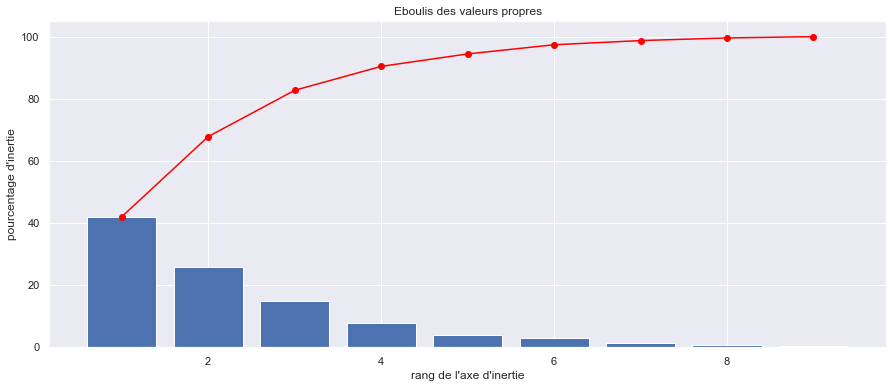

In [34]:
# Scree Plot ou éboulis des valeurs propres
plt.figure(figsize=(15, 6))
plt.bar(xListe, scree)
plt.plot(xListe, screeCum, c='red', marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Calcul des composantes

In [35]:
pcs = pca.components_
pcs

array([[ 0.30391475, -0.22272904,  0.29332714, -0.2242352 , -0.35142596,
         0.33672897, -0.46516403,  0.40344421, -0.3250753 ],
       [-0.26556355,  0.3747318 ,  0.42968414,  0.11023806,  0.3760654 ,
         0.39538647, -0.07601139,  0.37546061,  0.38440492],
       [ 0.26150219,  0.53078295, -0.06822503,  0.70849688, -0.19618228,
        -0.08094948, -0.20361864,  0.00951777, -0.23805911],
       [ 0.72711344,  0.04884341, -0.05133508, -0.17050834,  0.37403076,
        -0.24174931, -0.26196891, -0.02064346,  0.41208782],
       [ 0.06472293,  0.02581391,  0.78988016, -0.0117657 , -0.21495843,
        -0.51113853,  0.23316638, -0.09505102,  0.01498344],
       [-0.16362656,  0.58288121, -0.16012614, -0.54639579,  0.07256133,
        -0.34820309, -0.07237215,  0.26277153, -0.32937816],
       [-0.37906419, -0.28086976, -0.13949283,  0.20667007, -0.12751868,
        -0.50235635, -0.47388428,  0.35671432,  0.30792435],
       [-0.10524469, -0.25693803,  0.19104115,  0.17201331,  0

In [36]:
# Transformation en DataFrame
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8
0,0.303915,-0.222729,0.293327,-0.224235,-0.351426,0.336729,-0.465164,0.403444,-0.325075
1,-0.265564,0.374732,0.429684,0.110238,0.376065,0.395386,-0.076011,0.375461,0.384405
2,0.261502,0.530783,-0.068225,0.708497,-0.196182,-0.080949,-0.203619,0.009518,-0.238059
3,0.727113,0.048843,-0.051335,-0.170508,0.374031,-0.241749,-0.261969,-0.020643,0.412088
4,0.064723,0.025814,0.789880,-0.011766,-0.214958,-0.511139,0.233166,-0.095051,0.014983
5,-0.163627,0.582881,-0.160126,-0.546396,0.072561,-0.348203,-0.072372,0.262772,-0.329378
6,-0.379064,-0.280870,-0.139493,0.206670,-0.127519,-0.502356,-0.473884,0.356714,0.307924
7,-0.105245,-0.256938,0.191041,0.172013,0.682644,-0.126382,-0.246113,-0.129081,-0.545539
8,-0.233036,0.201320,0.128588,-0.188513,-0.151499,0.120189,-0.568343,-0.688298,0.137572


In [37]:
# Affichage des colonnes et index
pcs.columns = features
pcs.index = [f"F{i}" for i in xListe]
pcs.round(2)

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab
F1,0.30,-0.22,0.29,-0.22,-0.35,0.34,-0.47,0.40,-0.33
F2,-0.27,0.37,0.43,0.11,0.38,0.40,-0.08,0.38,0.38
F3,0.26,0.53,-0.07,0.71,-0.20,-0.08,-0.20,0.01,-0.24
F4,0.73,0.05,-0.05,-0.17,0.37,-0.24,-0.26,-0.02,0.41
F5,0.06,0.03,0.79,-0.01,-0.21,-0.51,0.23,-0.10,0.01
F6,-0.16,0.58,-0.16,-0.55,0.07,-0.35,-0.07,0.26,-0.33
F7,-0.38,-0.28,-0.14,0.21,-0.13,-0.50,-0.47,0.36,0.31
F8,-0.11,-0.26,0.19,0.17,0.68,-0.13,-0.25,-0.13,-0.55
F9,-0.23,0.20,0.13,-0.19,-0.15,0.12,-0.57,-0.69,0.14


In [38]:
# Transposition
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9
enfant_mort,0.303915,-0.265564,0.261502,0.727113,0.064723,-0.163627,-0.379064,-0.105245,-0.233036
exportations,-0.222729,0.374732,0.530783,0.048843,0.025814,0.582881,-0.280870,-0.256938,0.201320
dep_sante,0.293327,0.429684,-0.068225,-0.051335,0.789880,-0.160126,-0.139493,0.191041,0.128588
importations,-0.224235,0.110238,0.708497,-0.170508,-0.011766,-0.546396,0.206670,0.172013,-0.188513
revenu,-0.351426,0.376065,-0.196182,0.374031,-0.214958,0.072561,-0.127519,0.682644,-0.151499
taux_croissance,0.336729,0.395386,-0.080949,-0.241749,-0.511139,-0.348203,-0.502356,-0.126382,0.120189
life_expec,-0.465164,-0.076011,-0.203619,-0.261969,0.233166,-0.072372,-0.473884,-0.246113,-0.568343
total_fertilite,0.403444,0.375461,0.009518,-0.020643,-0.095051,0.262772,0.356714,-0.129081,-0.688298
pib_par_hab,-0.325075,0.384405,-0.238059,0.412088,0.014983,-0.329378,0.307924,-0.545539,0.137572


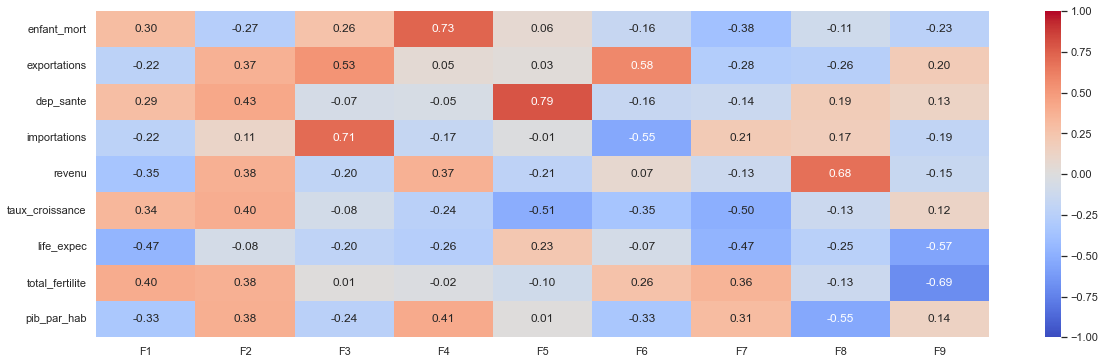

In [39]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [40]:
# Cercle de Corrélation

# Initialisation des 2 premières composantes
x, y = 0,1

In [41]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

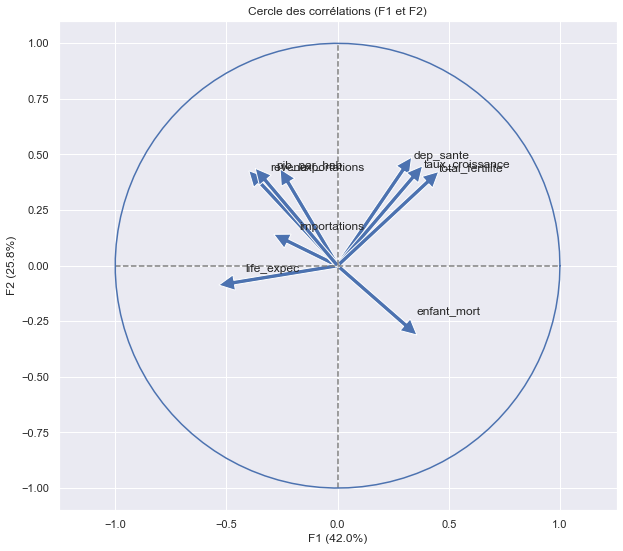

In [42]:
correlation_graph(pca, (0, 1), features)

In [43]:
features

Index(['enfant_mort', 'exportations', 'dep_sante', 'importations', 'revenu',
       'taux_croissance', 'life_expec', 'total_fertilite', 'pib_par_hab'],
      dtype='object')

In [44]:
# Calcul des coordonnées des individus dans le nouvel espace
Xproj = pca.transform(Xscaled)
Xproj[:5]

array([[ 1.64348683, -1.25011311,  0.25994567,  0.60962872,  0.00371113,
        -0.52640482,  0.32475376,  0.21795694, -0.02477293],
       [-0.2617242 , -0.61405684, -0.21826342, -0.87339097,  0.11862571,
        -0.17102272, -0.01593639,  0.09877914, -0.156867  ],
       [-0.21116874, -0.63797495, -0.46067595, -0.4707116 , -0.14038769,
         0.46714455, -0.30249142, -0.13274988, -0.16999049],
       [ 1.02315275, -0.87107429,  1.28293336,  1.3329572 , -0.37419501,
         0.53967128, -0.52257451, -0.49152892, -0.08777219],
       [-0.87290787,  0.04320172,  0.16852189, -0.67465969, -0.02356798,
        -0.09616388,  0.03918623,  0.0794117 , -0.14978279]])

In [45]:
# Fonction pour projeter les individs sur le plan factoriel

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticalestaux_croissance
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

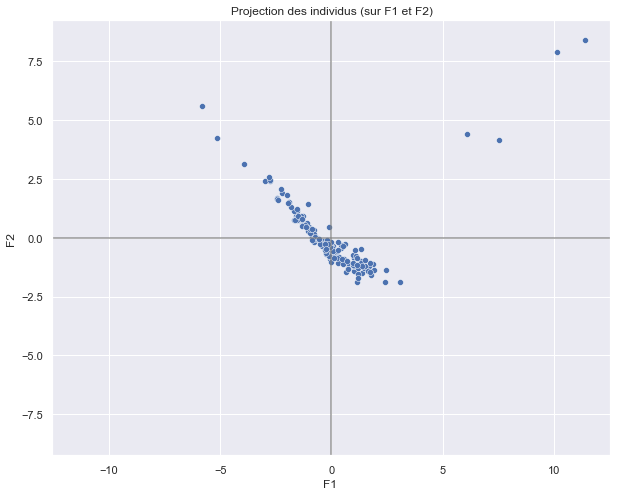

In [46]:
x_y = [0,1]
display_factorial_planes(Xproj, x_y)

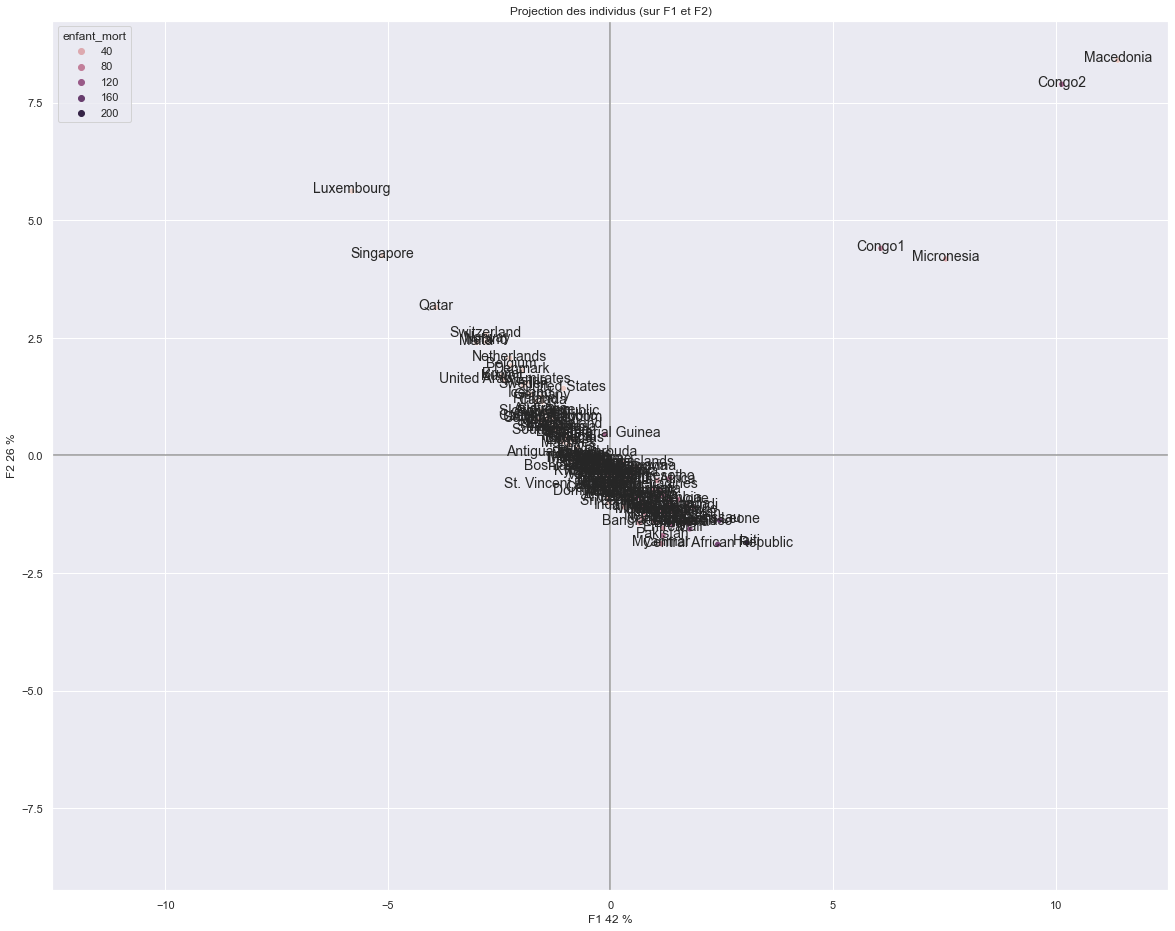

In [47]:
x_y = [0,1]
display_factorial_planes(Xproj, x_y, pca, labels=names, figsize=(20,16), clusters=df['enfant_mort'], marker="o", )

# Clustering

## K-means

In [48]:
from sklearn.cluster import KMeans

In [49]:
# Choix du nombre de cluster

# Instanciation
kmeans = KMeans(n_clusters=3)

In [50]:
# Entraînement 
kmeans.fit(X)

KMeans(n_clusters=3)

In [51]:
# Calcul de l'inertie
kmeans.inertia_

22732836157.5046

## Méthode du coude

In [52]:
# Liste vide pour stocker les inerties
inertia = []

In [53]:
# Nombre de cluster à tester
kListe = range(1, len(features)+1)
list(kListe)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [54]:
# Liste des inerties selon k=i
for i in kListe:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

C:\Users\THINKPAD\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
# Liste des inertie
inertia

[118384454292.13824,
 36986368434.253555,
 22106804433.285046,
 14887603244.047916,
 10840930995.159159,
 7841278000.39112,
 5539320369.028936,
 4444450105.048198,
 3413659057.55497]

In [56]:
# Ecriture sous forme exponentielle
for i in range(len(inertia)):
    exp = "{:.2e}".format(inertia[i])
    print(exp)

1.18e+11
3.70e+10
2.21e+10
1.49e+10
1.08e+10
7.84e+09
5.54e+09
4.44e+09
3.41e+09


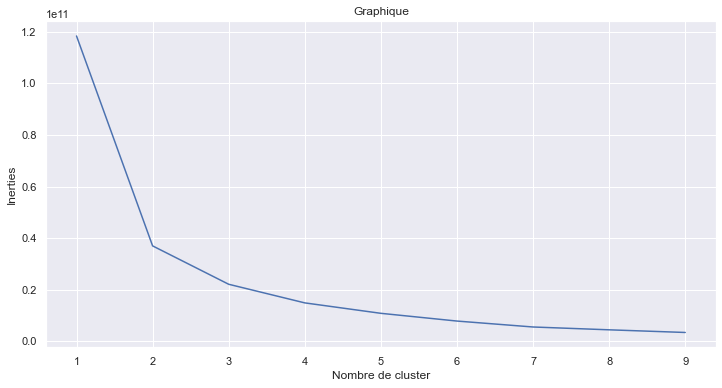

In [57]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

plt.title("Graphique")
ax.set_ylabel("Inerties")
ax.set_xlabel("Nombre de cluster")
ax = plt.plot(kListe, inertia)

In [58]:
len(inertia)

9

In [59]:
# elbow point

from kneed import KneeLocator
kl = KneeLocator(kListe, inertia, curve = "convex",direction = "decreasing") 
elbowpoint = kl.elbow
print("elbow point : %.i" % (elbowpoint))

elbow point : 3


In [60]:
# Re-entrainement pour k=3
kmeans = KMeans(n_clusters=elbowpoint)
kmeans.fit(df)

KMeans(n_clusters=3)

In [61]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [62]:
# Transformation des numeros des clusters en lettres
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [63]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'c', 'a']

In [64]:
# Ajout des clusters(labels) à X
df['clusters'] = labels
df.head()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab,clusters
pays,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,a
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,a
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,a
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,a
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,a


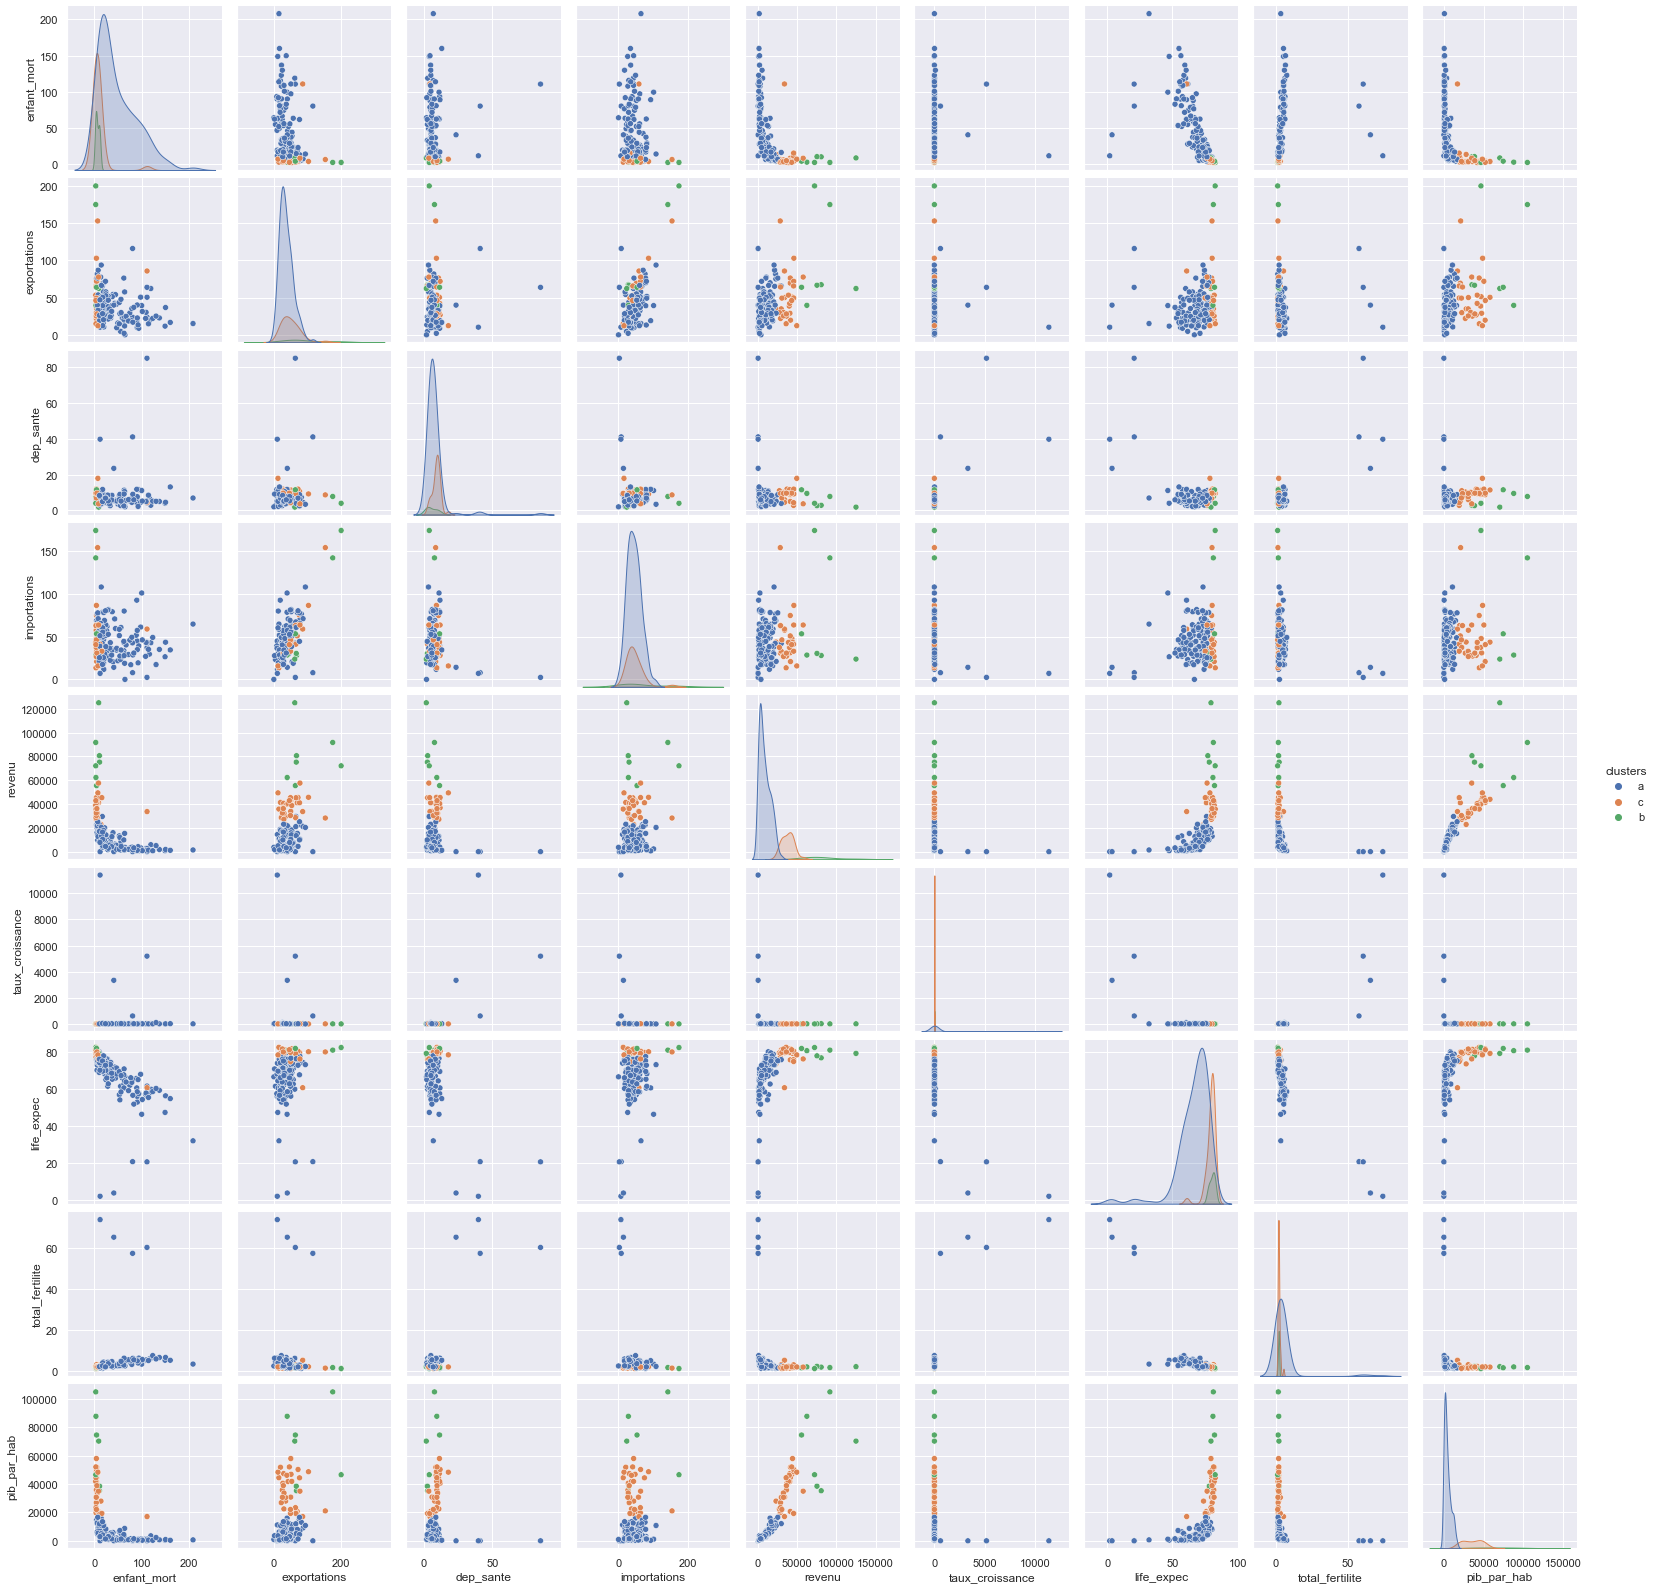

In [65]:
# Pairplot
sns.pairplot(df, hue="clusters")
plt.show()

In [66]:
resultat = pca.transform(Xscaled)

In [67]:
# Ajout des composantes principales 
df['F1_FactSanitaire']=resultat[:, 0]
df['F2_FactSocioEco']=resultat[:, 1]

In [68]:
df.head()

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab,clusters,F1_FactSanitaire,F2_FactSocioEco
pays,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,a,1.643487,-1.250113
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,a,-0.261724,-0.614057
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,a,-0.211169,-0.637975
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,a,1.023153,-0.871074
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,a,-0.872908,0.043202


In [69]:
facteur = ['clusters', 'F1_FactSanitaire', 'F2_FactSocioEco']

In [70]:
df_final = df[facteur]
df_final.head()

,clusters,F1_FactSanitaire,F2_FactSocioEco
pays,,,
Afghanistan,a,1.643487,-1.250113
Albania,a,-0.261724,-0.614057
Algeria,a,-0.211169,-0.637975
Angola,a,1.023153,-0.871074
Antigua and Barbuda,a,-0.872908,0.043202


In [71]:
df_final.groupby('clusters').mean().round(2)

,F1_FactSanitaire,F2_FactSocioEco
clusters,,
a,0.58,-0.43
b,-3.61,3.06
c,-1.54,1.05


In [75]:
df.groupby('clusters').mean().round(2)

,enfant_mort,exportations,dep_sante,importations,revenu,taux_croissance,life_expec,total_fertilite,pib_par_hab,F1_FactSanitaire,F2_FactSocioEco
clusters,,,,,,,,,,,
a,47.50,36.18,7.57,44.27,8410.68,169.05,66.23,5.15,4356.69,0.58,-0.43
b,6.23,96.44,5.71,68.57,80342.86,6.39,80.29,1.77,65442.86,-3.61,3.06
c,8.80,49.98,8.99,46.02,37621.88,3.38,79.16,1.94,35587.50,-1.54,1.05


In [73]:
# Formation des clusters

for i in ['a', 'b', 'c']:
    print(f'CLUSTER {i}',':', len(df[df.clusters==i].index), 'pays')
    print(df[df.clusters==i].index.tolist(),'\n')

CLUSTER a : 128 pays
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo1', 'Congo2', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia', 'Moldova', 'Mongolia', 'Mon